In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [72]:
# Load the data
df = pd.read_csv(r'C:\Users\krr_i\Downloads\delhiaqi (1).csv')

print(df.info())

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    561 non-null    object 
 1   co      561 non-null    float64
 2   no      561 non-null    float64
 3   no2     561 non-null    float64
 4   o3      561 non-null    float64
 5   so2     561 non-null    float64
 6   pm2_5   561 non-null    float64
 7   pm10    561 non-null    float64
 8   nh3     561 non-null    float64
dtypes: float64(8), object(1)
memory usage: 39.6+ KB
None
                  date       co     no    no2    o3    so2   pm2_5    pm10  \
0  2023-01-01 00:00:00  1655.58   1.66  39.41  5.90  17.88  169.29  194.64   
1  2023-01-01 01:00:00  1869.20   6.82  42.16  1.99  22.17  182.84  211.08   
2  2023-01-01 02:00:00  2510.07  27.72  43.87  0.02  30.04  220.25  260.68   
3  2023-01-01 03:00:00  3150.94  55.43  44.55  0.85  35.76  252.90  304.12   
4  2023-01-01 04:00:00  3471.37  68.84  4

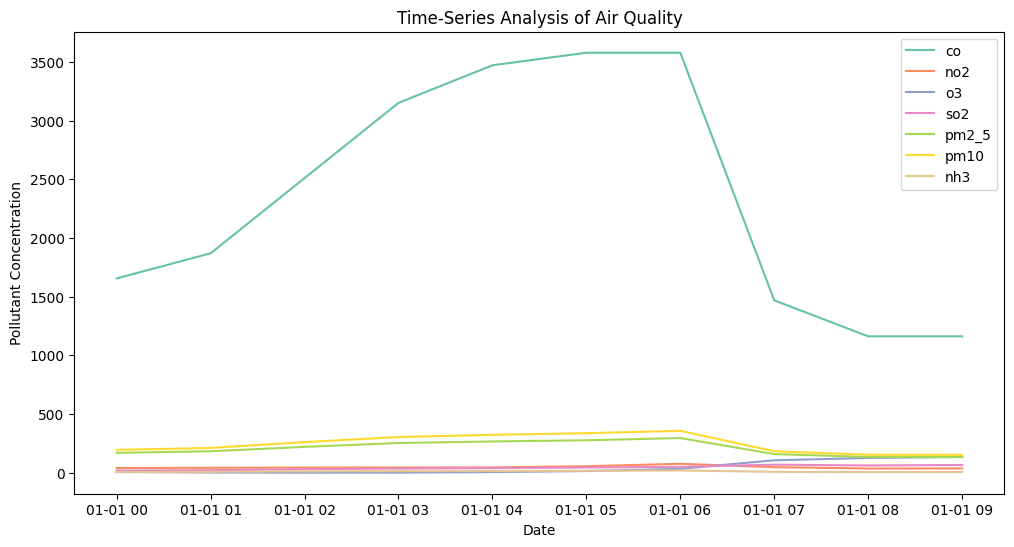

In [73]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year.astype('category')
df['month'] = df['date'].dt.month.astype('category')
df['day'] = df['date'].dt.day.astype('category')
df.set_index('date', inplace=True)


pollutants = ['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
df = df.iloc[:10]
plt.figure(figsize=(12, 6))
for pollutant in pollutants:
    plt.plot(df.index, df[pollutant], label=pollutant)

plt.xlabel('Date')
plt.ylabel('Pollutant Concentration')
plt.title('Time-Series Analysis of Air Quality')
plt.legend()
plt.show()

In [74]:
aqi_breakpoints = {
    'co': [0, 4.4, 9.4, 12.4, 15.4, 30.4, 40.4],
    'no2': [0, 53, 100, 360, 649, 1249, 1649],
    'o3': [0, 54, 70, 85, 105, 200, 404],
    'so2': [0, 35, 75, 185, 304, 604, 1004],
    'pm2_5': [0, 12, 35.4, 55.4, 150.4, 250.4, 350.4],
    'pm10': [0, 54, 154, 254, 354, 424, 604],
    'nh3': [0, 53, 104, 154, 204, 304, 404]
}

def calculate_aqi(row):
    max_aqi = 0
    for pollutant in aqi_breakpoints:
        concentration = row[pollutant]
        breakpoints = aqi_breakpoints[pollutant]
        index = next((i for i, x in enumerate(breakpoints) if x >= concentration), len(breakpoints) - 1)
        aqi = ((breakpoints[index] - breakpoints[index - 1]) / (concentration - breakpoints[index - 1])) * (index - 1) + breakpoints[index - 1]
        if aqi > max_aqi:
            max_aqi = aqi
    return max_aqi


df['AQI'] = df.apply(calculate_aqi, axis=1)

df.tail(20)

,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,day,AQI
date,,,,,,,,,,,,
2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,2023,1,1,171.575225
2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,2023,1,1,162.730456
2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,2023,1,1,298.910180
2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,2023,1,1,450.400000
2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,2023,1,1,281.728321
2023-01-01 05:00:00,3578.19,64.37,55.52,14.13,44.35,276.54,336.79,16.21,2023,1,1,269.527774
2023-01-01 06:00:00,3578.19,46.94,76.09,33.26,50.54,295.40,357.07,19.25,2023,1,1,445.205212
2023-01-01 07:00:00,1468.66,9.83,47.30,105.86,68.66,158.83,182.61,7.09,2023,1,1,546.860465
2023-01-01 08:00:00,1161.58,5.81,35.99,125.89,61.99,134.39,153.47,5.51,2023,1,1,123.190522


In [75]:
def categorize_aqi(aqi):
    if 0 <= aqi <= 50:
        return 'Good'
    elif 51 <= aqi <= 100:
        return 'Satisfactory'
    elif 101 <= aqi <= 200:
        return 'Moderately Polluted'
    elif 201 <= aqi <= 300:
        return 'Poor'
    elif 301 <= aqi <= 400:
        return 'Very Poor'
    elif 401 <= aqi <= 500:
        return 'Severe'
    else:
        return 'Invalid AQI Value'


df['Air Quality Category'] = df['AQI'].apply(categorize_aqi)

df.head(20)

,co,no,no2,o3,so2,pm2_5,pm10,nh3,year,month,day,AQI,Air Quality Category
date,,,,,,,,,,,,,
2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,2023,1,1,171.575225,Moderately Polluted
2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,2023,1,1,162.730456,Moderately Polluted
2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,2023,1,1,298.910180,Poor
2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,2023,1,1,450.400000,Severe
2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,2023,1,1,281.728321,Poor
2023-01-01 05:00:00,3578.19,64.37,55.52,14.13,44.35,276.54,336.79,16.21,2023,1,1,269.527774,Poor
2023-01-01 06:00:00,3578.19,46.94,76.09,33.26,50.54,295.40,357.07,19.25,2023,1,1,445.205212,Severe
2023-01-01 07:00:00,1468.66,9.83,47.30,105.86,68.66,158.83,182.61,7.09,2023,1,1,546.860465,Invalid AQI Value
2023-01-01 08:00:00,1161.58,5.81,35.99,125.89,61.99,134.39,153.47,5.51,2023,1,1,123.190522,Moderately Polluted


In [76]:
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# If there are missing values, handle them accordingly
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:  # Check if the column is numeric
        df[column] = df[column].fillna(df[column].mean())  # Fill missing values with the mean for numeric columns
    else:
        # Convert categorical columns with missing values to include 'missing' as a category
        df[column] = df[column].astype('category')
        df[column] = df[column].cat.add_categories(['missing'])
        df[column] = df[column].fillna('missing')  # Use 'missing' for non-numeric columns

print(df)

                co         no        no2          o3        so2       pm2_5  \
count    10.000000  10.000000  10.000000   10.000000  10.000000   10.000000   
mean   2360.536000  29.200000  46.646000   42.782000  43.629000  209.002000   
std    1014.079846  27.082013  11.797622   55.985015  17.932298   60.971827   
min    1161.580000   1.660000  35.990000    0.020000  17.880000  133.220000   
25%    1515.390000   6.062500  40.097500    2.855000  31.470000  161.445000   
50%    2189.635000  18.775000  44.210000   10.015000  41.725000  201.545000   
75%    3391.262500  53.307500  46.785000   87.710000  59.127500  262.995000   
max    3578.190000  68.840000  76.090000  134.470000  68.660000  295.400000   

             pm10        nh3         AQI  
count   10.000000  10.000000   10.000000  
mean   247.535000  10.671000  286.802262  
std     78.389285   4.933737  150.527393  
min    152.090000   5.510000  117.894469  
25%    185.617500   6.287500  164.941648  
50%    235.880000   9.530000  

Text(0.5, 1.0, 'Correlation Matrix of Pollutants')

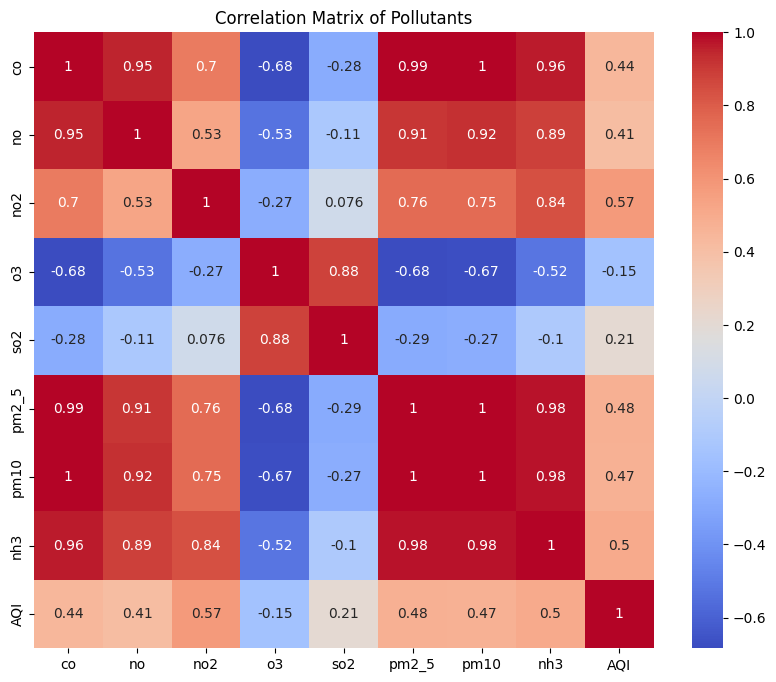

In [77]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pollutants')


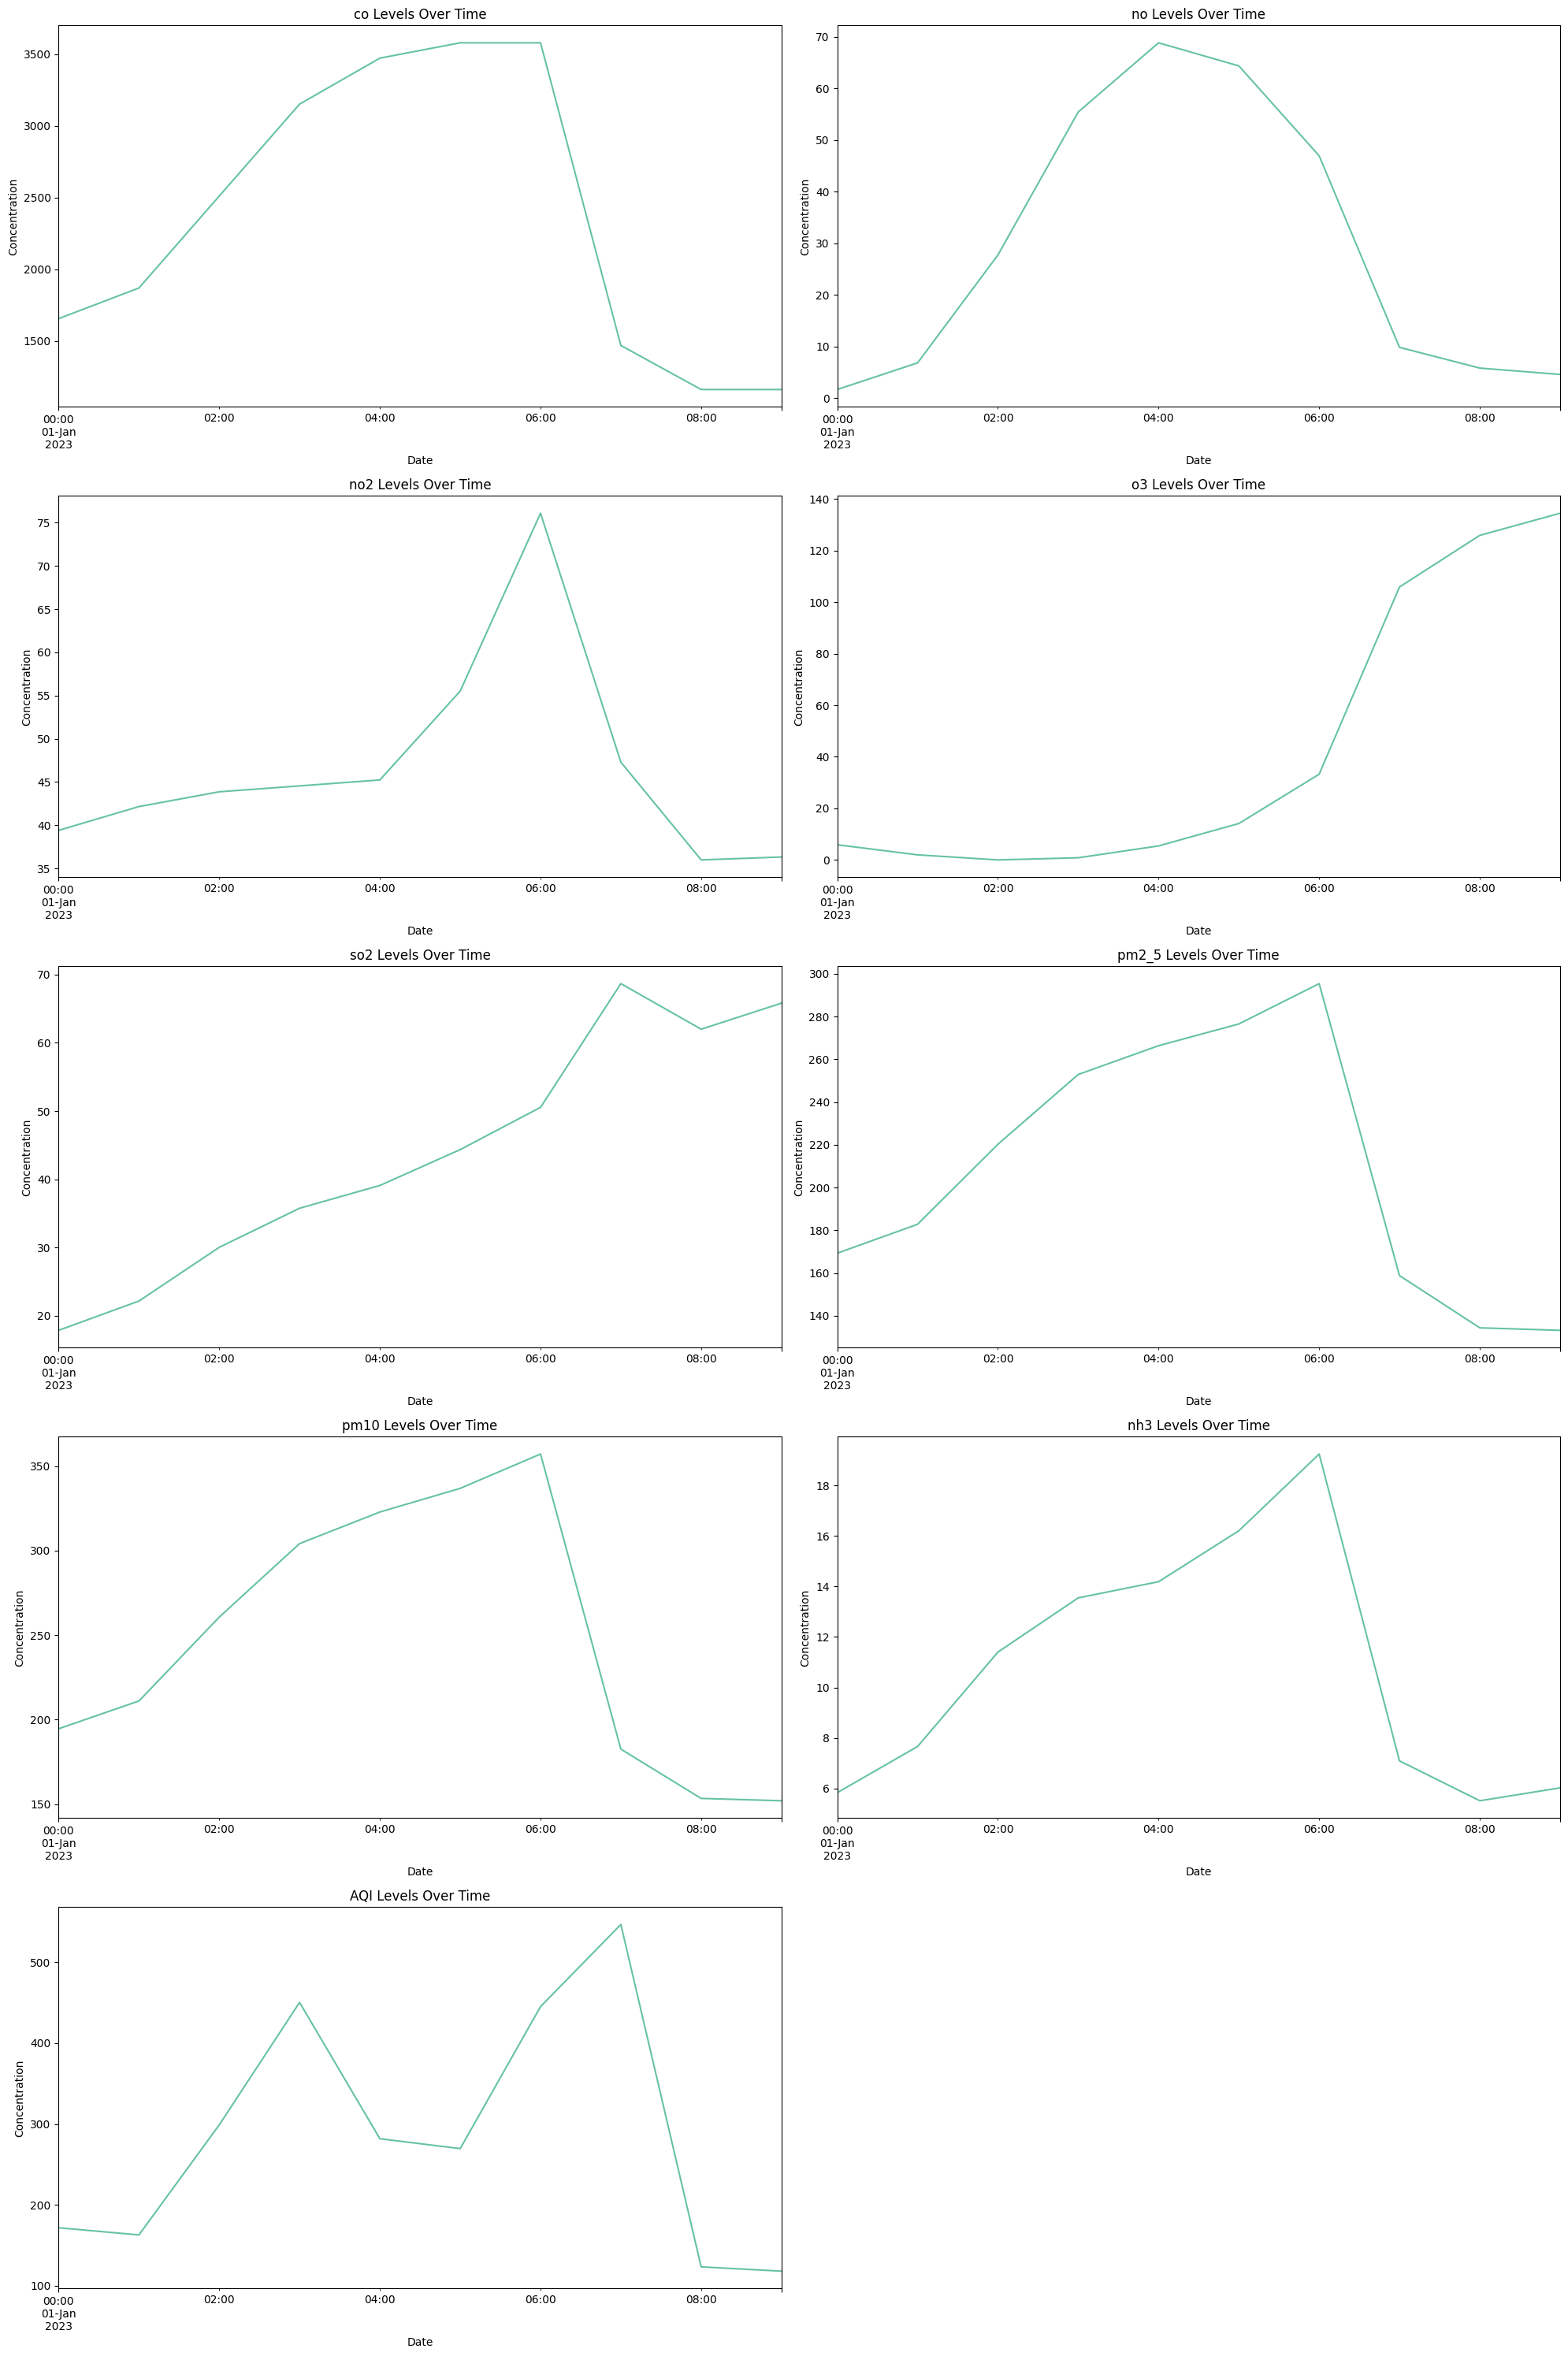

In [78]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the plot grid based on the number of numeric columns
num_plots = len(numeric_columns)
fig, axes = plt.subplots((num_plots // 2) + (num_plots % 2), 2, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    df[col].plot(ax=axes[i])
    axes[i].set_title(f'{col} Levels Over Time')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Concentration')

# Hide any remaining unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [79]:
from scipy import stats

# Assuming 'df' is your DataFrame and the index is a datetime type
df.index = pd.to_datetime(df.index)

# Print the highest level for each column along with the date
for col in df.columns[1:]:
    if df[col].dtype in ['float64', 'int64']:  # Ensure column is numeric
        max_day = df[col].idxmax()
        print(f"Highest {col} level: {df[col].max()} on {max_day.date()}")

# Perform basic statistical tests
# Check if there's a significant correlation between PM2.5 and PM10
if 'pm2_5' in df.columns and 'pm10' in df.columns:
    correlation, p_value = stats.pearsonr(df['pm2_5'], df['pm10'])
    print(f"Correlation between PM2.5 and PM10: {correlation}")
    print(f"P-value: {p_value}")

Highest no level: 68.84 on 2023-01-01
Highest no2 level: 76.09 on 2023-01-01
Highest o3 level: 134.47 on 2023-01-01
Highest so2 level: 68.66 on 2023-01-01
Highest pm2_5 level: 295.4 on 2023-01-01
Highest pm10 level: 357.07 on 2023-01-01
Highest nh3 level: 19.25 on 2023-01-01
Highest AQI level: 546.8604651162793 on 2023-01-01
Correlation between PM2.5 and PM10: 0.9997175649812204
P-value: 2.7829476138156716e-14


([<matplotlib.patches.Wedge at 0x1a5a11b1b90>,
 [Text(-0.8843256088476653, 0.6541927984441638, 'co'),
  Text(0.37352126811229447, -1.0346409339803755, 'no2'),
  Text(0.46986942170144563, -0.9945967658050922, 'o3'),
  Text(0.5589598968723926, -0.94739845560799, 'so2'),
  Text(0.7899245854638708, -0.7655188758480956, 'pm2_5'),
  Text(1.0555364399304688, -0.30958492207940663, 'pm10'),
  Text(1.099929487559535, -0.012454814210546216, 'nh3')])

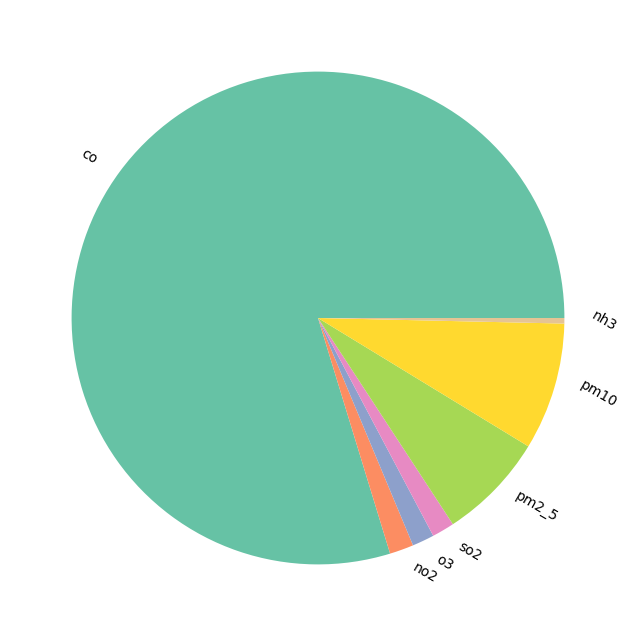

In [80]:
pollutants = df[['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']].sum()
plt.figure(figsize=(8, 8))
sns.set_palette("Set2") 
plt.pie(pollutants, labels=pollutants.index, textprops={'rotation': 330})

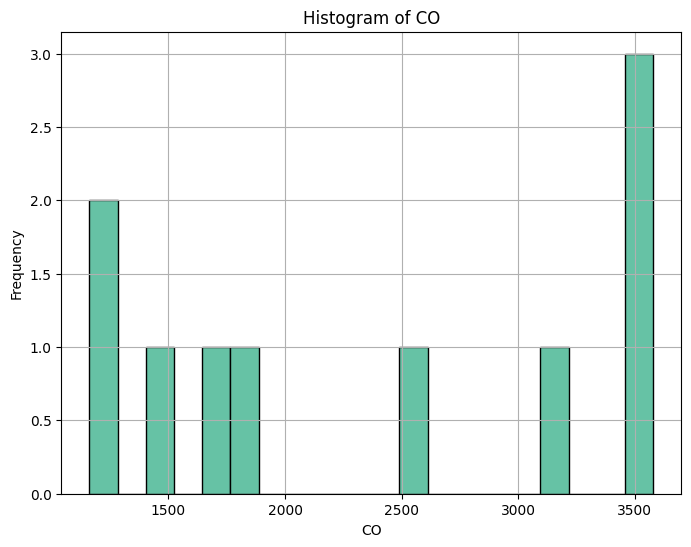

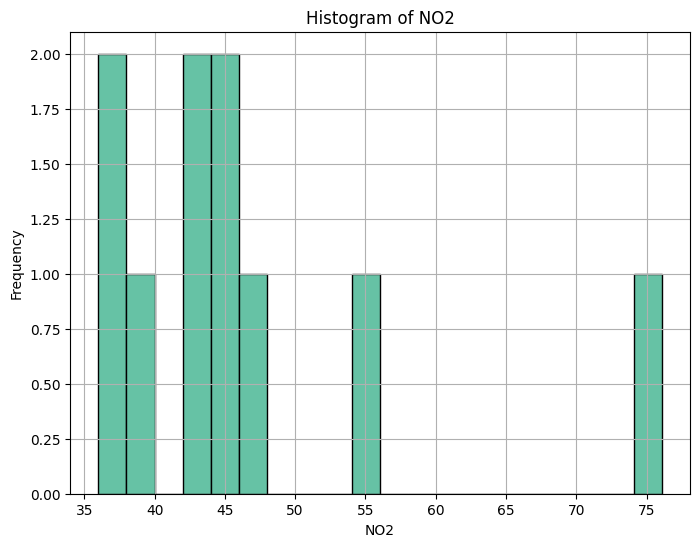

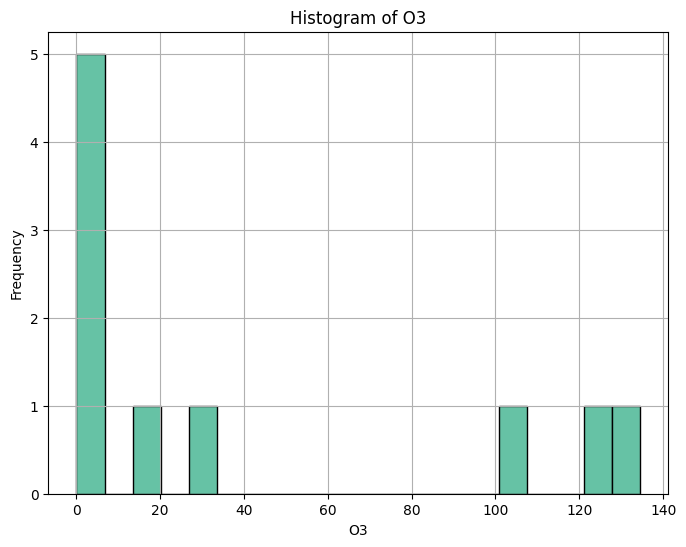

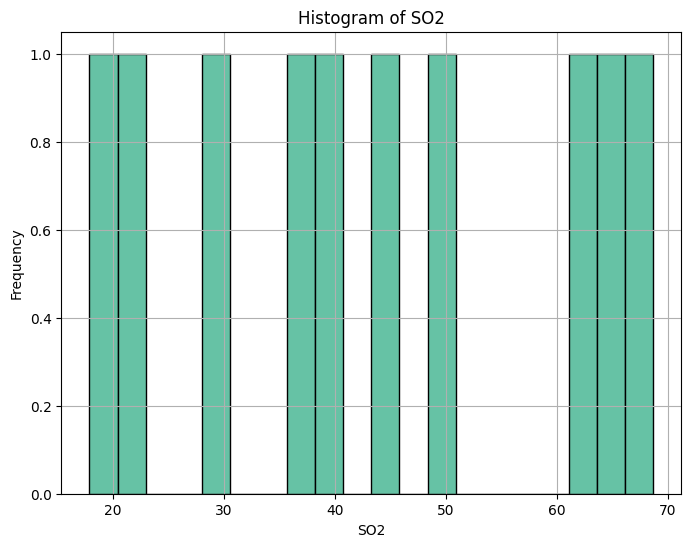

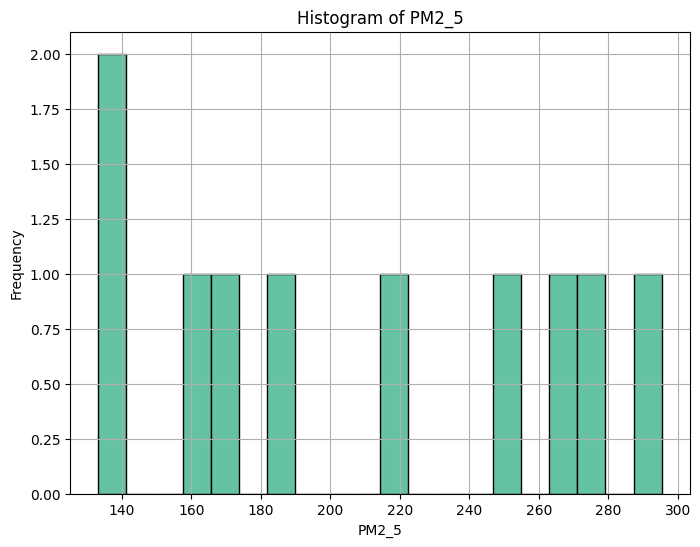

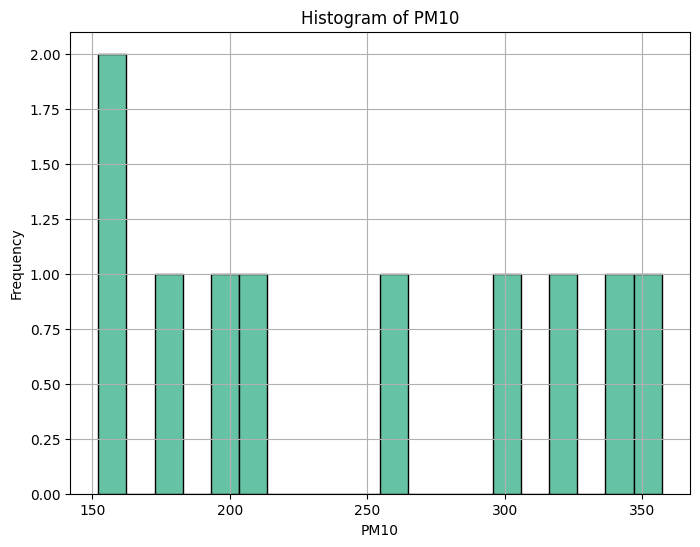

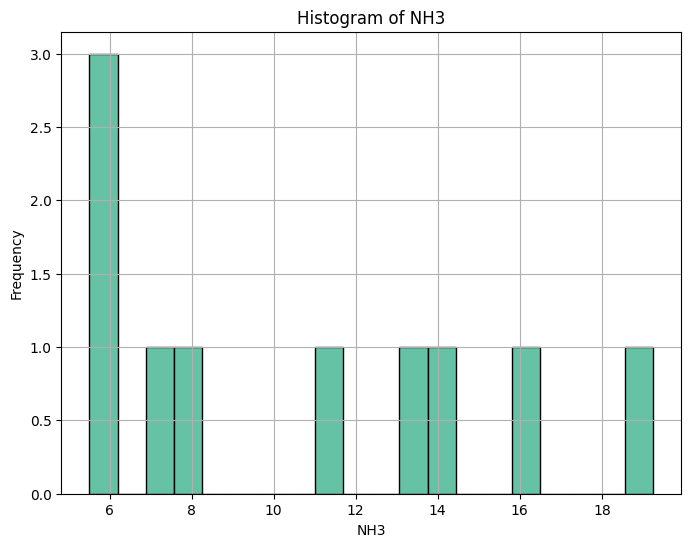

In [81]:
pollutants = ['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

for pollutant in pollutants:
    plt.figure(figsize=(8, 6))
    plt.hist(df[pollutant], bins=20, edgecolor='black')
    plt.xlabel(pollutant.upper())
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {pollutant.upper()}')
    plt.grid(True)
    plt.show()

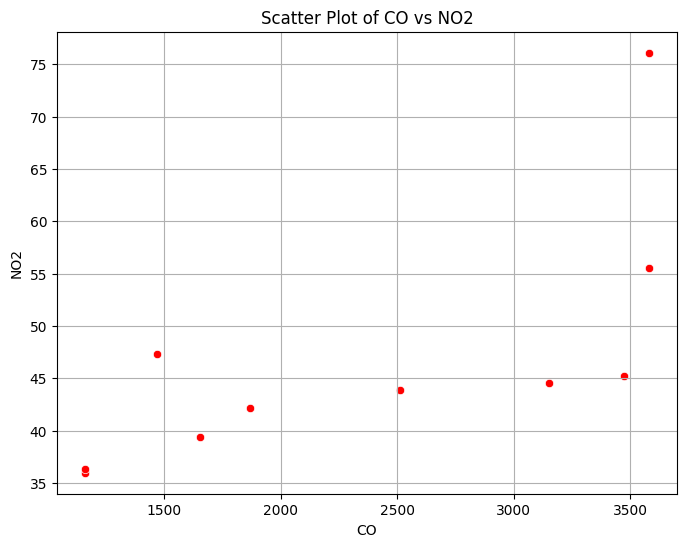

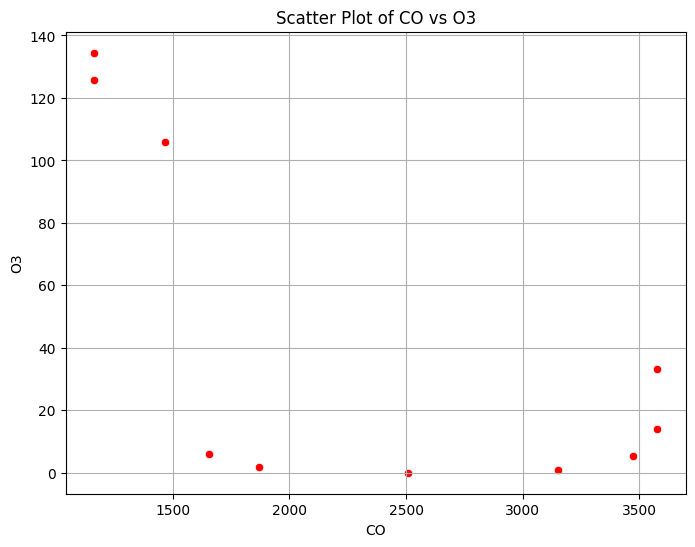

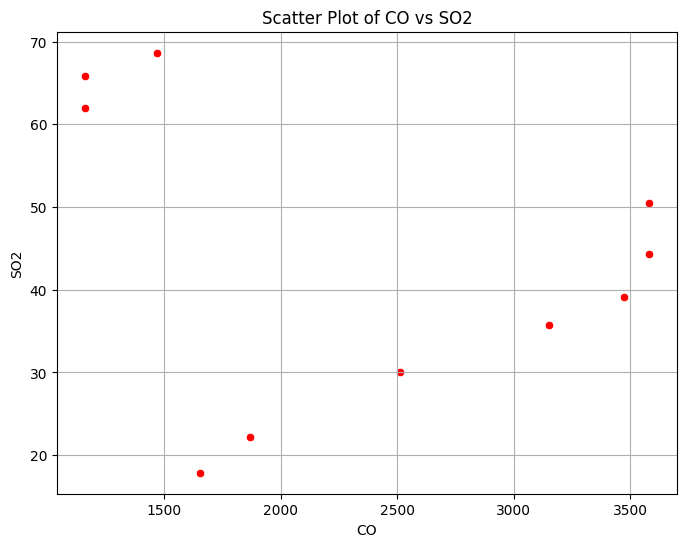

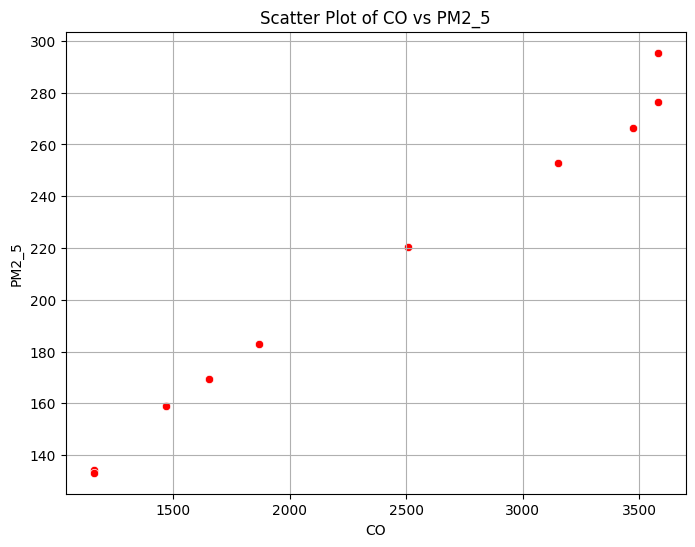

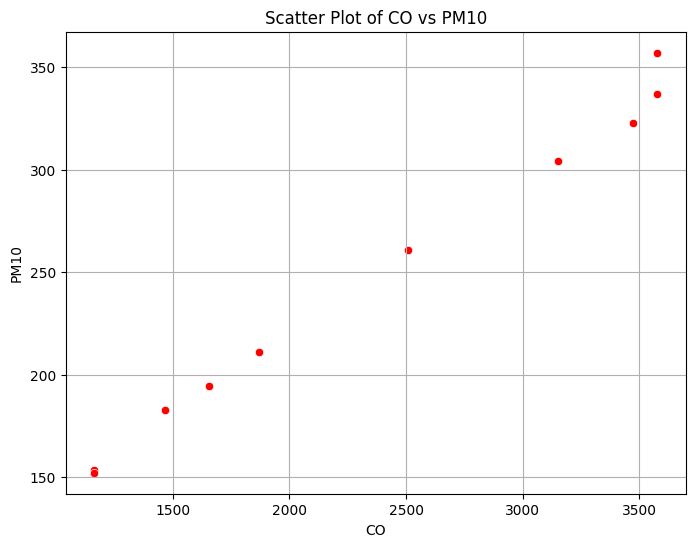

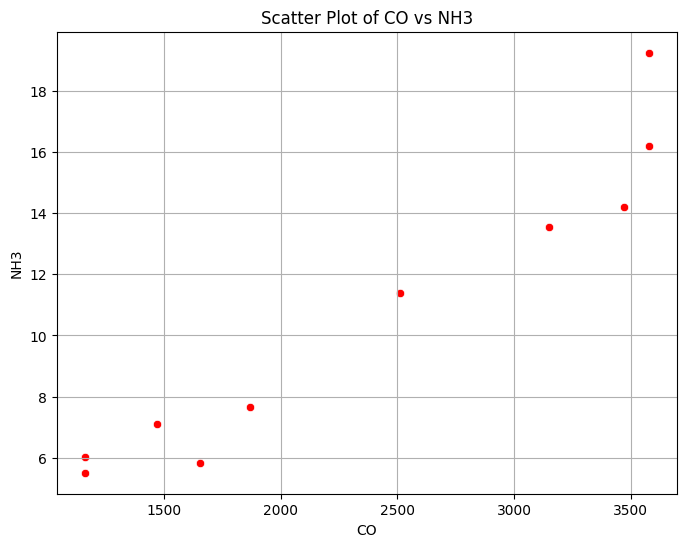

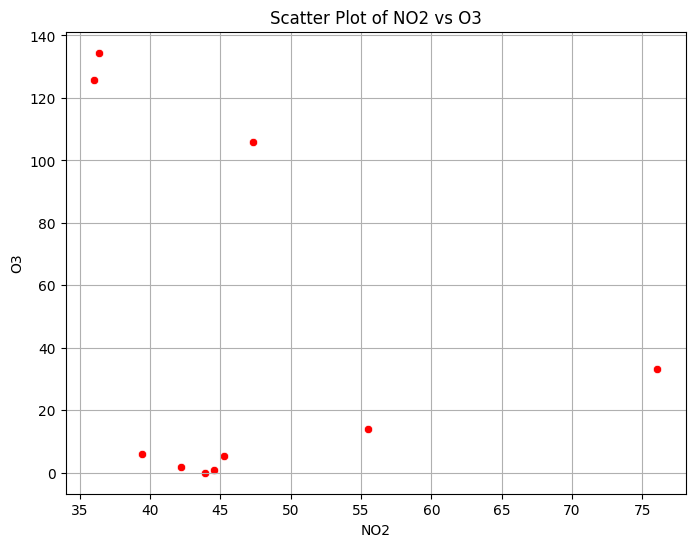

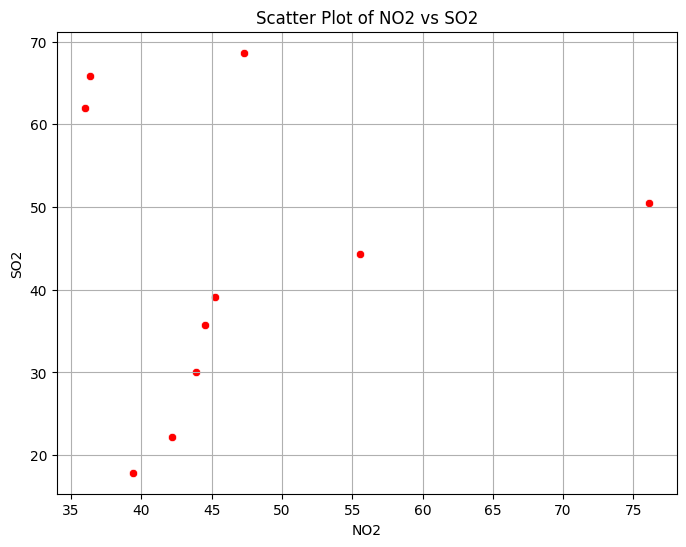

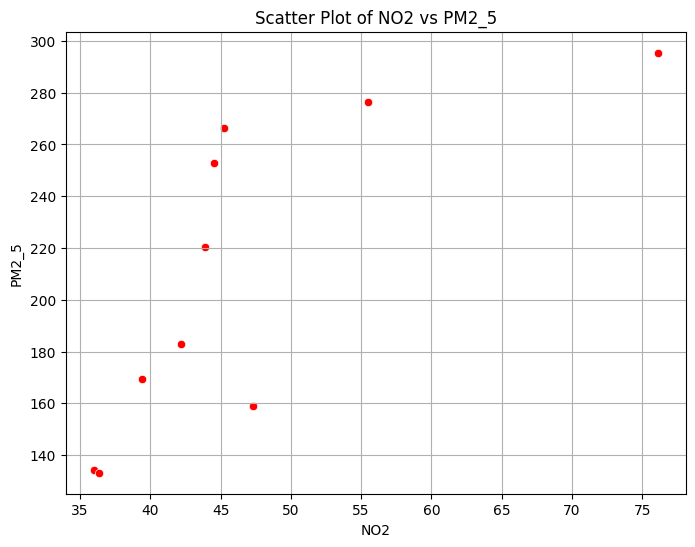

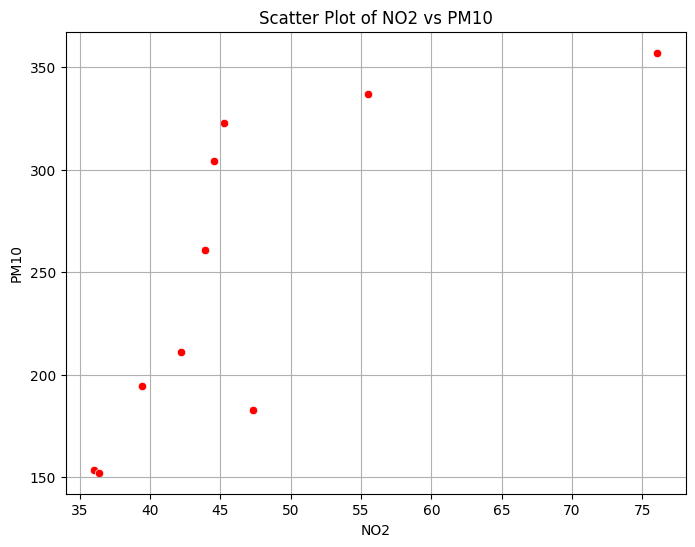

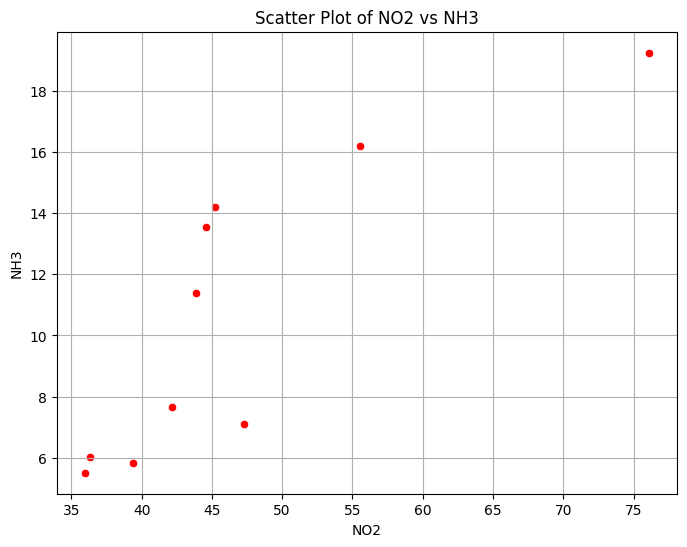

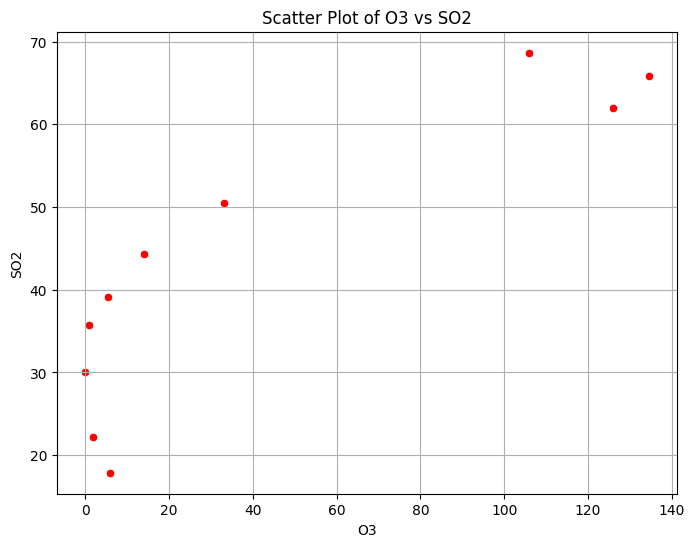

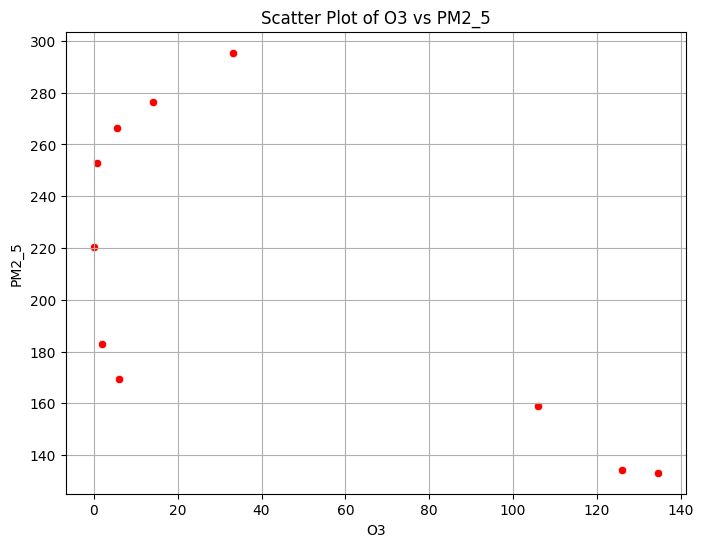

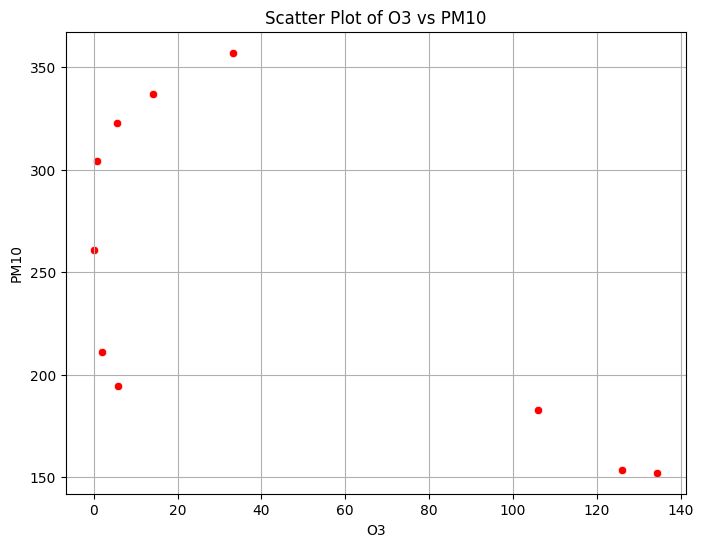

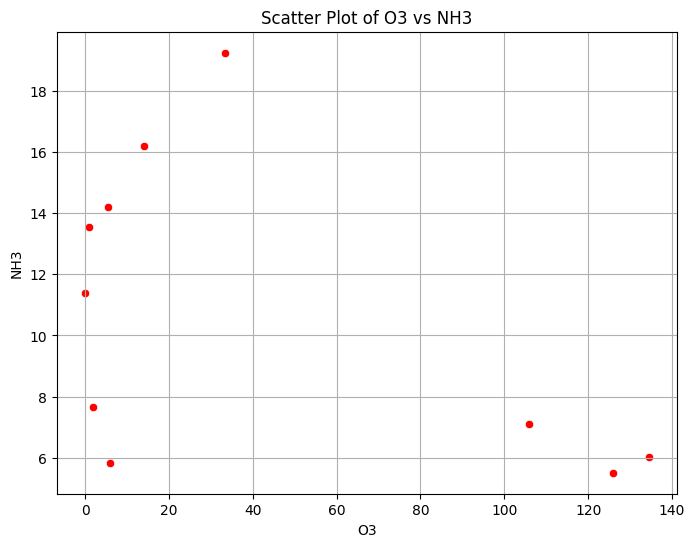

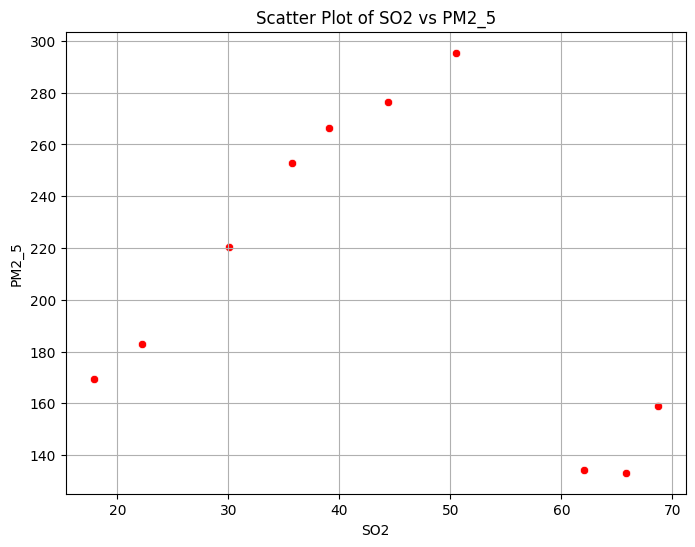

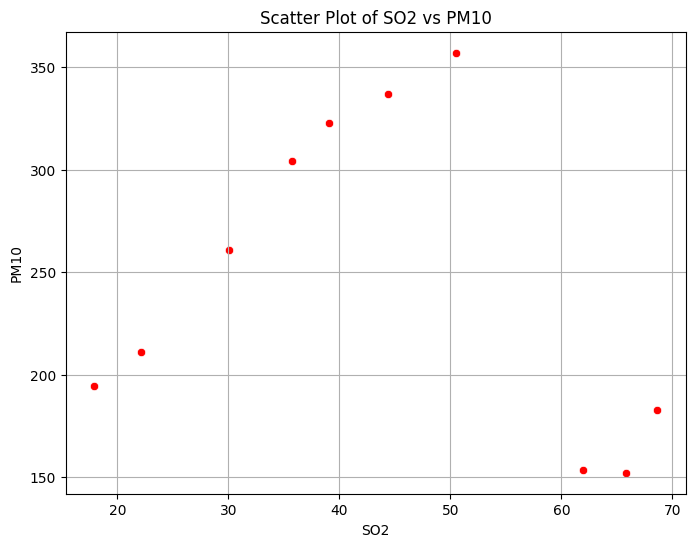

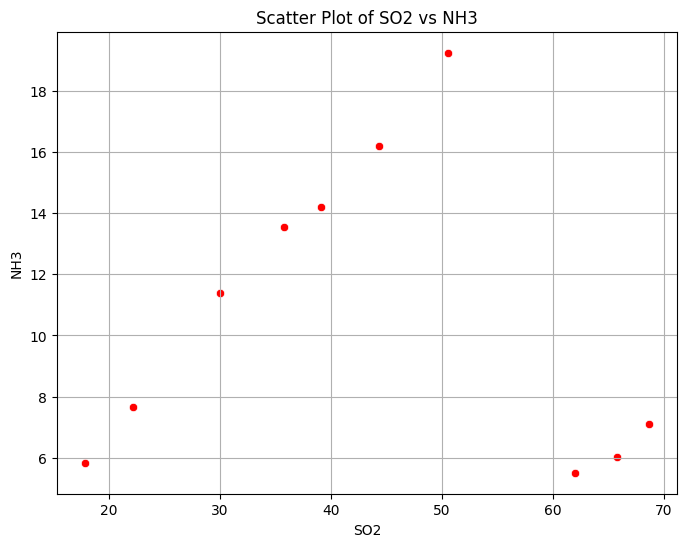

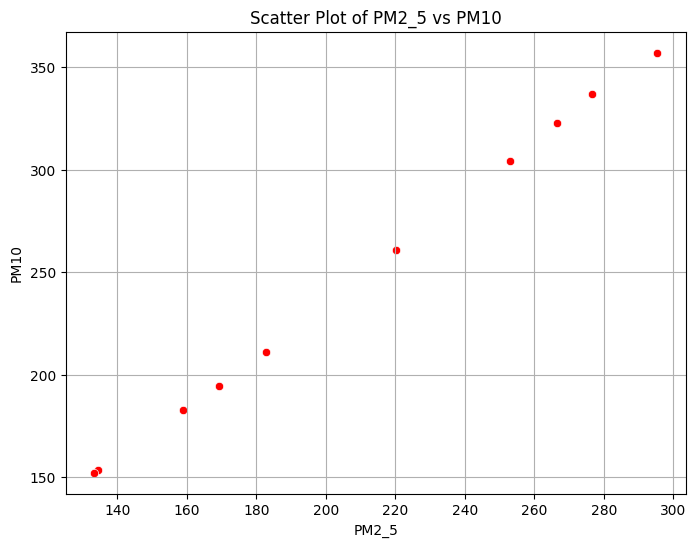

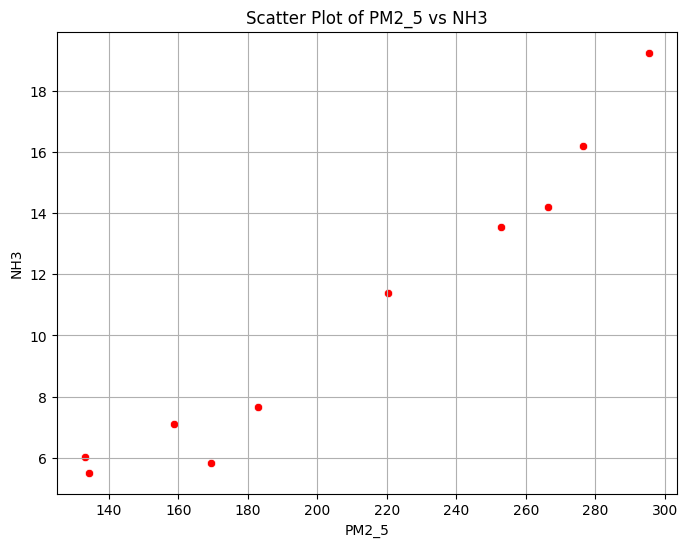

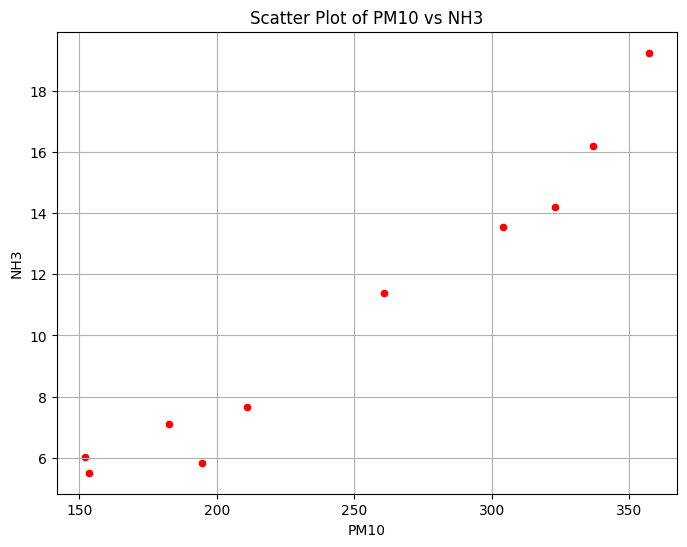

In [82]:
for i in range(len(pollutants)):
    for j in range(i+1, len(pollutants)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df, x=pollutants[i], y=pollutants[j],color='red')
        plt.xlabel(pollutants[i].upper())
        plt.ylabel(pollutants[j].upper())
        plt.title(f'Scatter Plot of {pollutants[i].upper()} vs {pollutants[j].upper()}')
        plt.grid(True)
        plt.show()